# May 10th

In [43]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [44]:
print(tweepy.__version__)


3.10.0


In [45]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [46]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [47]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [48]:
#gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
english_tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-10', tweet_mode='extended').items(2000)

#store tweets in a variable and get the full text
all_eng_tweets = [tweet.full_text for tweet in english_tweets]

In [49]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_eng_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,[⭐️🔵 NEW LISTING⭐️]\n[PUBLISHED] BEING LISTED ...
1,@LovecoinProject Great projects\n@Abdulhafizfm...
2,2021 performance in comparison… seems I picked...
3,Top 5 #bitcoin remnants of 2021 from twitter.\...
4,Crypto Prices (USD/₿)\n\nBitcoin ➨ $47305.0408...
5,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47305.0408...
6,NFT news.\n\nShopify barely bothered announcin...
7,#Bitcoin #bsc #bake $bake #bakeusdt The crappi...
8,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...
9,#affiliate #affiliatemarketing #businesstips #...


In [50]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [51]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,[⭐️🔵 NEW LISTING⭐️]\n[PUBLISHED] BEING LISTED ...,[⭐️🔵 NEW LISTING⭐️][PUBLISHED] BEING LISTED IN...
1,@LovecoinProject Great projects\n@Abdulhafizfm...,@LovecoinProject Great projects@Abdulhafizfm11...
2,2021 performance in comparison… seems I picked...,2021 performance in comparison… seems I picked...
3,Top 5 #bitcoin remnants of 2021 from twitter.\...,Top 5 bitcoin remnants of 2021 from twitter.@B...
4,Crypto Prices (USD/₿)\n\nBitcoin ➨ $47305.0408...,Crypto Prices (USD/₿)Bitcoin ➨ $47305.0408➶Axi...


In [52]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,[⭐️🔵 NEW LISTING⭐️]\n[PUBLISHED] BEING LISTED ...,[⭐️🔵 NEW LISTING⭐️][PUBLISHED] BEING LISTED IN...,0.454545,0.136364
1,@LovecoinProject Great projects\n@Abdulhafizfm...,@LovecoinProject Great projects@Abdulhafizfm11...,0.750000,0.800000
2,2021 performance in comparison… seems I picked...,2021 performance in comparison… seems I picked...,0.535714,0.285714
3,Top 5 #bitcoin remnants of 2021 from twitter.\...,Top 5 bitcoin remnants of 2021 from twitter.@B...,0.525568,0.407884
4,Crypto Prices (USD/₿)\n\nBitcoin ➨ $47305.0408...,Crypto Prices (USD/₿)Bitcoin ➨ $47305.0408➶Axi...,0.000000,0.000000
5,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47305.0408...,Crypto Prices (USD/₿)Bitcoin ➤ $47305.0408➶Eth...,0.000000,0.000000
6,NFT news.\n\nShopify barely bothered announcin...,NFT news.Shopify barely bothered announcing it...,0.100000,0.050000
7,#Bitcoin #bsc #bake $bake #bakeusdt The crappi...,Bitcoin $bake The crappiest most infamous w...,0.825000,-0.150000
8,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,"Bitcoin BitcoinBTC = $47,198.05Change = 0...",0.000000,0.000000
9,#affiliate #affiliatemarketing #businesstips #...,bitcoin free shipping on purcha...,0.800000,0.400000


In [53]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [54]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,[⭐️🔵 NEW LISTING⭐️]\n[PUBLISHED] BEING LISTED ...,[⭐️🔵 NEW LISTING⭐️][PUBLISHED] BEING LISTED IN...,0.454545,0.136364,Positive
1,@LovecoinProject Great projects\n@Abdulhafizfm...,@LovecoinProject Great projects@Abdulhafizfm11...,0.750000,0.800000,Positive
2,2021 performance in comparison… seems I picked...,2021 performance in comparison… seems I picked...,0.535714,0.285714,Positive
3,Top 5 #bitcoin remnants of 2021 from twitter.\...,Top 5 bitcoin remnants of 2021 from twitter.@B...,0.525568,0.407884,Positive
4,Crypto Prices (USD/₿)\n\nBitcoin ➨ $47305.0408...,Crypto Prices (USD/₿)Bitcoin ➨ $47305.0408➶Axi...,0.000000,0.000000,Neutral
5,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47305.0408...,Crypto Prices (USD/₿)Bitcoin ➤ $47305.0408➶Eth...,0.000000,0.000000,Neutral
6,NFT news.\n\nShopify barely bothered announcin...,NFT news.Shopify barely bothered announcing it...,0.100000,0.050000,Positive
7,#Bitcoin #bsc #bake $bake #bakeusdt The crappi...,Bitcoin $bake The crappiest most infamous w...,0.825000,-0.150000,Negative
8,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,"Bitcoin BitcoinBTC = $47,198.05Change = 0...",0.000000,0.000000,Neutral
9,#affiliate #affiliatemarketing #businesstips #...,bitcoin free shipping on purcha...,0.800000,0.400000,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


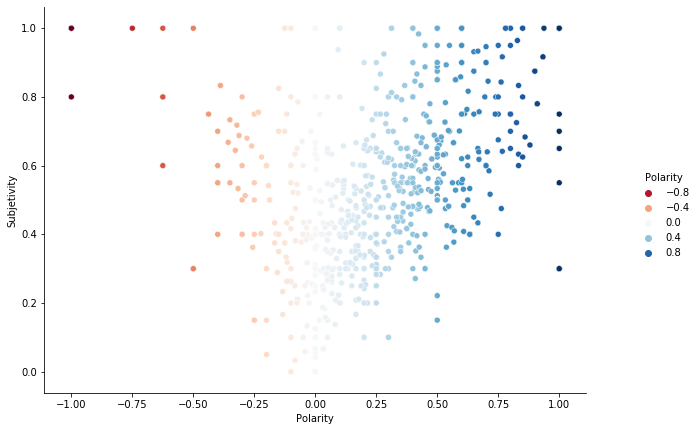

In [55]:
import seaborn as sns

ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

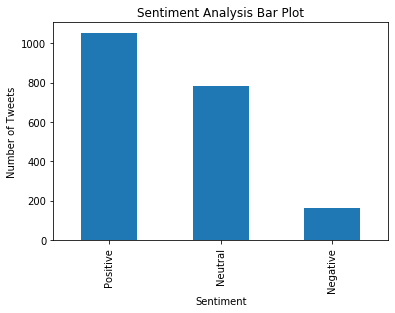

In [56]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()